# BLG454E Learning From Data Homework 1

Before starting, read the README.txt file. If you have any questions, send an e-mail at kamard@itu.edu.tr.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Part 1: Simple Linear Regression  (30 points)

### Background

Remember from the course material: In Linear Regression, we aim to find the line that fits the given data as well as possible. The line formula is:

### <center> $ \hat{y} = f(x) = \beta_0 + \beta_1 x $ <center> 

And using linear regression, the goal is to find the $\beta_0$ and $\beta_1$ such that the the Mean Squared Error (MSE) is minimized:
    
### <center> $ MSE \Rightarrow \mathcal{L} = \dfrac{1}{N} \sum_{i=1}^{N} (y_i - f(x_i ))^2 $ <center> 
    
As the MSE error gets smaller, the line starts to represent the data better and better.
    
Consider $\beta = (\beta_0 + \beta_1)$. In order to find the $\beta$ that minimizes the MSE loss, we use **Gradient Descent**. Iteratively $\beta$ is updated in the opposite direction of the gradient, while the size of the update is controlled with the learning rate $\eta$:
    
### <center> $ \beta \leftarrow \beta-\eta \frac{d \mathcal{L}}{d \beta} $ <center> 

### Your Task

In this part, you are going to code up Simple Linear Regression on the data given in **data1.csv**, and find the line that fits the data best. To do so, you'll need to complete the following:

- Code up the gradient descent, and print the loss value at every time step. You can use the number of steps as the stopping criteria (e.g. stopping gradient descent after 10 steps). 
- At the end of the algorithm, plot the found line with the data.
    
Given learning rate and number of iterations as default values in the code should work, but you are free to change them to make your algorithm faster if you'd like. You are not allowed to use any libraries other than the imported ones at the beginning. You can initialize the $\beta$ randomly.

In [1]:

def load_data():
    df = pd.read_csv("data1.csv")
    x = df['x'].values
    y = df['y'].values
    return x, y
"""
to compute the gradient descent method and find the appropriate alpha and w values which is labeled as beta0 and beta1 in our case
first we need a cost function, and a function to calculate partial derivatives which will be symbolized with dj_dw and dj_db 
which implies the partial derivative of the cost function Jw,b(x) with respect to w or b.

"""

def convert_Df_to_numpy(in_dataframe):

    array_values= np.empty(50)
    for i in range (len(in_dataframe)):
        array_values[i]= in_dataframe[i]
    return array_values

def compute_cost(x_dataframe,y_dataframe,w,b):
    """
        The cost function Jw,b(x)= 1/n * Σ[f(xi)-yî]^2
    """
    n =len(x_dataframe) # the size of the sample 
    cost =0 
    for i in range(0,n):
        f_wb= w*x[i]+b
        cost +=(f_wb-y[i])**2
    # to get the result of the equation 1/n * Σ[f(xi)-yî]^2 divide by n 
    desired_cost= cost/n
    return desired_cost 

# Now we need a function to calculate the partial derivatives dj_dw and dj_db 

def calculate_gradient(x_dataframe,y_dataframe,w,b):
    n= len(x_dataframe) # size of the dataframe 
    dj_dw=0 
    dj_db=0
    for i in range(0,n):
        f_wb= w*x[i]+b
        dj_dw_i= (f_wb-y[i])*x[i]
        dj_db_i= (f_wb-y[i])
        dj_db +=dj_db_i
        dj_dw +=dj_dw_i
    dj_dw= dj_dw/n
    dj_db= dj_db/n 
    return dj_dw ,dj_db

def gradient_descent(x, y, learning_rate = 0.1, max_its = 500):
    #TO DO: Initialize the beta values
    beta0 = 0
    beta1 = 0 # give the w,b values randomly 

    # start gradient descent loop
    for k in range(0,max_its):
        # TO DO: calculate derivative (grad)
        dj_dw ,dj_db= calculate_gradient(x,y,beta0,beta1)
        
        # TO DO: take gradient descent step
        beta0 =beta0- learning_rate *dj_dw
        beta1= beta1- learning_rate *dj_db
        
        # TO DO: calculate and print the loss value
        j= compute_cost(x,y,beta0,beta1)
        if k==0:
            print("For {}.".format(k+1),"th iteration, ","Cost: {}".format(j))
        elif (k+1)% (max_its/10)==0:
            print("For {}.".format(k+1),"th iteration, ","Cost: {}".format(j))
    return beta0, beta1

For 1. th iteration,  Cost: 2.2722276263553955
For 50. th iteration,  Cost: 0.0034679724368972737
For 100. th iteration,  Cost: 0.0027993364217042205
For 150. th iteration,  Cost: 0.0024522786731480677
For 200. th iteration,  Cost: 0.002269602854116985
For 250. th iteration,  Cost: 0.00217345039006694
For 300. th iteration,  Cost: 0.002122839989676029
For 350. th iteration,  Cost: 0.0020962009154408133
For 400. th iteration,  Cost: 0.0020821792860794925
For 450. th iteration,  Cost: 0.0020747989211234792
For 500. th iteration,  Cost: 0.002070914223740576
-----------------------------------------------------
founded w:0.8205331715289811
founded b:1.3494952369211874


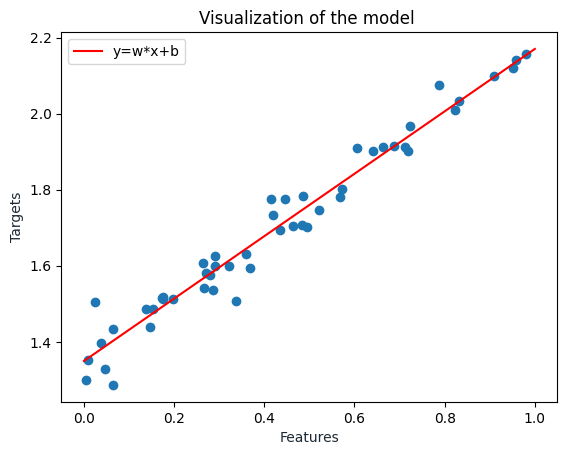

In [4]:
x, y = load_data()
beta0, beta1 = gradient_descent(x, y)
print("-----------------------------------------------------")
print(("founded w:{}".format(beta0)))
print(("founded b:{}".format(beta1)))
# TO DO: Plot the data AND the line!
x_values_array= convert_Df_to_numpy(x)
y_values_array= convert_Df_to_numpy(y)
x = np.linspace(0,1,2)
y = beta0*x +beta1
plt.plot(x, y, '-r', label='y=w*x+b')
plt.title('Visualization of the model ')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.scatter(x_values_array,y_values_array)
plt.xlabel('Features')
plt.ylabel('Targets')
plt.show()

# Part 2: Multi Linear Regression on California House Pricing Dataset using 5-fold Cross Validation (50 points)

In this part, you are going to train a Multi Linear Regression Model on a real dataset! The dataset we are going to use is **California House Pricing Dataset**. The target is to predict the median house value in California, given the 8 features ( You can examine the name of the features when you run the load_data function given below ). In this part, you will also use Cross-Validation with 5 folds, in addition to everything you implemented in Part 1. You will also alter your code so that it works with multiple attribute. In this case, you will have 8 features and you can code up assuming you will always have 8 features. At the end, you will report your results. 

In summary, you will need to do the following:

- Code up gradient descent with Cross Validation for Multi Linear Regression
- Find the best working learning rate and number of iterations setup.
- Report the MSE loss periodically during training in folds (For example, if you are training for 1000 steps, you can print MSE loss for each 100 steps. If you are training for 100000 steps ( which you can, if you'd like ), you can print MSE loss for each 10000 steps. In total, if you print the loss 10 times periodically for each fold, it's fine ).
- Save the final MSE results on the testing set on each fold in an array. Print the average testing MSE losses at the end of the algorithm. Additionally, print the variance of the testing MSE losses. 

In this part, we are giving you only the load_data function, so you are flying solo for Multi Linear Regression! It is up to you to find the working learning rate and number of iterations setup. In addition to the libraries imported for Part 1, you are allowed to use sklearn for fetching dataset (which is already done for you), and the KFold class for the cross-validation. Other than that, you are not allowed to use sklearn or any other additional libraries.



Features of Boston Housing Prices dataset:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Shape of the X:  (20640, 8)
Shape of the Y:  (20640,)
<class 'numpy.ndarray'>


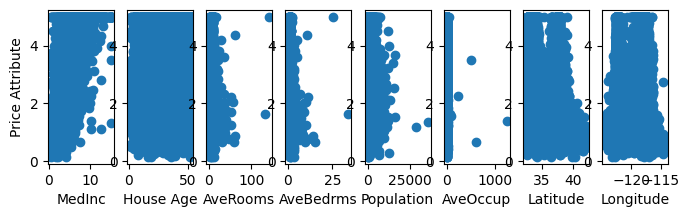

PRINT X:
[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
Type of X:(20640, 8)
Type of X:<class 'numpy.ndarray'>
print Y
[4.526 3.585 3.521 ... 0.923 0.847 0.894]
<class 'numpy.ndarray'>
size of the train data set while implementing the cross validation for each fold: 16512
size of the test data set while implementing the cross validation for each fold: 4128
Iteration for the 1. Fold !
Iteration: 0  ,Cost:462.6259371131136
Iteration: 10  ,Cost:411.1597796036265
Iteration: 20  ,Cost

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import KFold

def load_data():
    data= fetch_california_housing()
    print("Features of Boston Housing Prices dataset: ", data.get("feature_names"))
    print("Shape of the X: ", data.data.shape)
    print("Shape of the Y: ", data.target.shape)
    return data.data, data.target

x,y=load_data()
print(type(x))
"""
    'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'
        8.3252       41  6.98412698    1.02380952  322          2.55555556   37.88       -122.23 
        8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01 2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02
        7.2574       52.            8.28813559    1.07344633  496., 2.80225989   37.85       -122.24      

"""
def visualize_data(x,y,X_features=['MedInc','House Age','AveRooms',
'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']):

    # function to visualize the data corresponding to its attributes ! 
    # since we have 8 columns we will have 8 different figures for each attribute ! 
    fig,graph=plt.subplots(1, 8, figsize=(8, 2))
    for i in range(len(graph)):
        graph[i].scatter(x[:,i],y)
        graph[i].set_xlabel(X_features[i])
    graph[0].set_ylabel("Price Attribute")
    plt.show()

visualize_data(x,y)

def kFold_cross_validation(X,y,w,b,k=5):
        
    """
    STEP 1: Randomly divide a dataset into k groups 
    STEP 2: Choose one of the folds to be the holdout set and fit the model on the remaining k-1 fold of data
    STEP 3: Repeat the process k times
    STEP 4: Calculate the overall train MSE to be the average of the k train MSE'S 
    """
    kf = KFold(n_splits=k)
    kf.get_n_splits(X)    
    w_result,b_result,cost_cross_validation,mse_list=calculate_MSE_train(X, y,kf,w,b)

    return w_result,b_result,cost_cross_validation,mse_list

def calculate_MSE_train(X,y,kf,w,b):
    #print("Average MSE of all folds function: ")
    #print("CV(D)= (1/k)Σ (1/m)ΣL(A(DK),yi")
    # A(DK)= w1*x1 +w2*x2 +w3*x3 +b 
    # MSE of a single fold= 1/m Σ(A(DK)-yi)**2 
    # Average MSE of k fold= (1/k)Σ(1/m)Σ(A(DK)-yi)**2

    total_cost=0
    k=0
    number_of_iterations = 100
    alpha=3.0e-7
    total_w=0
    total_b=0
    cost_cross_validation=0
    mse_list= []
    for train_index, test_index in kf.split(X):
        k+=1
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        if k==1: #to print out this only once
            
            print("size of the train data set while implementing the cross validation for each fold: {}".format(len(X_train)))
            print("size of the test data set while implementing the cross validation for each fold: {}".format(len(X_test)))
        print("Iteration for the {}. Fold !".format(k))
        #total_cost+= calculate_cost_model_multi_linear(X_train, y_train, w, b)
        w_result, b_result, total_cost=gradient_descent_multi_liner(X_train,y_train,w,b,alpha,number_of_iterations)
        mse_list.append(total_cost)
        total_w+=w_result
        total_b+=b_result
        cost_cross_validation+=total_cost
        print("Average total cost for the {}.".format(k)," Fold: {}".format(total_cost))
        print("W for the {}. Fold".format(k),": {}".format(w_result))
        print("B for the {}. Fold".format(k),": {}".format(b_result))


        total_cost=0
    return total_w/5,total_b/5,cost_cross_validation/5,mse_list

def calculate_cost_model_multi_linear(x,y,w,b):
    size= len(x)
    cost=0
    for i in range(size):
        #print("The model: f(x)= x1*w1 +x2*w2 +.. +xn*wn+b ")
        #print("MSE of a single model: ΣL(A(DK),yi")

        f_wb_iter= np.dot(x[i],w)
        cost+= (f_wb_iter-y[i])**2    
    cost=cost/size
    return cost

def compute_gradient_multi_linear(x,y,w,b):
    """
        Method to compute and calculate the gradients that are needed while implementing 
        the gradient descent method while coping with multi linear regression
        wj= wj - alpha* dj_dw(w1,w2,w3,...,wn,b);
        b= b- aplha* dj_db(w1,w2,w3,...,wn, b); 
        n different features are given.
        L(w)= J(w) = (1/n)* Σ(w.transpose()*x^i)**0.5

        partial derivative with respect to w in ith iteration:
        dj_dwi= 2*(1/n) * sigma(w.tranpose()*x^i-yi)*xi
        partial derivative with respect to b:
        dj_db= (1/n)* sigma(f(xi)-yi)
        
    """
    m,n=x.shape
    #m=20640 n=8 
    dj_dw= np.zeros((n,))
    dj_db=0
    # m=20640 n=8
    # we have 20640 different input and each input has 8 features the x matrix is of shape mxn = 20640x8 
    
    for i in range(m):     
        """
        In the outer loop the process is done for all size of n namely 20640 different inputs
        """
        err = (np.dot(x[i], w) + b) - y[i]

        for j in range(n):
            """
            In the inner loop the partial derivative is computed for each column of the matrix.
            the number of columns of the matrix is 8 for this data set, which is also represented with n 
            """
            dj_dw[j] = dj_dw[j] + err * x[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
    return dj_dw, dj_db

def gradient_descent_multi_liner(x,y,w,b,alpha,num_of_iterations):
    """
        what it is needed to implement is repeating the process until the convergence is achieved:
        repeat{ 
            wi= wi -alpha *partital derivative  with respect to wi-> alpha *dj_dwi(w1,w2, ... ,wn ,b)
            and 
            b= b -alpha *partital derivative with respect to b -> alphha *dj_fb(w1 ,w2 ,.. ,wn ,b)  
            by vectorization it becomes as follows:
            wi= wi - alpha *dj_dw(w_vector,b)
            b= b - alpha* dj_db(w_vector,b)
        }
    """
    total_cost_history=[]
    total_cost_fold=0 
    for i in range(num_of_iterations):

        dj_dw,dj_db = compute_gradient_multi_linear(x, y, w, b)
        w = w - alpha * dj_dw              
        b = b - alpha * dj_db        
        total_cost_fold+=calculate_cost_model_multi_linear(x, y, w, b)
        if i<100000:     
            total_cost_history.append( calculate_cost_model_multi_linear(x, y, w, b))
        if i%(num_of_iterations / 10)== 0 or (i==num_of_iterations-1):
            print("Iteration: {}".format(i)," ,Cost:{}" .format(calculate_cost_model_multi_linear(x, y, w, b))) 
        
    return w, b, total_cost_fold/num_of_iterations
"""
    'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'
        8.3252       41  6.98412698    1.02380952  322          2.55555556   37.88       -122.23 
        8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01 2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02
        7.2574       52.            8.28813559    1.07344633  496., 2.80225989   37.85       -122.24      

"""    
w_initializer= np.array([0.0007,-0.009,2.1,-1.7,-0.001,0.0025,-0.0015,0.001])
initial_b = 25
number_of_iterations = 100
alpha=3.0e-7 # how to choose best alpha ? 
"""
now the task is to find the best working learning rate and number of iterations setup.
if we choose the alpha to high we may skip the points we desire to achieve 
if we choose the alpha too small it takes a lot of time to get the results
In order to visualize the convergence we need to have a cost function and visualize it. 
"""
print("PRINT X:")
print(x)
print("Type of X:{}".format(x.shape))
print("Type of X:{}".format(type(x)))
print("print Y")
print(y)
print(type(y))
w_result, b_result, cost_cross_validation,mse_list=kFold_cross_validation(x,y,w_initializer,initial_b)
print(("Founded w: {}".format(w_result)))
print(("Founded b: {}".format(b_result)))

for i in range (0,len(mse_list)):
    print("The MSE for {}.".format(i+1)," Fold: {}".format(mse_list[i]))
print("Cost cross validation: {}".format(cost_cross_validation))
#def multiple_gradient_descent_KFold(...):
#    x, y = load_data()

    #...

In [1]:
#x, y = load_data()
#multiple_gradient_descent_KFold(x, y)

# Part 3: Probability Questions (20 Points)

In this part, you are given 2 probability questions that you will solve by hand ( You do not code anything ). You can either share your answer via Markdown Cells, or you can insert an image of your hand-written solution on a paper. To insert an image, after changing the cell type to Markdown, click Edit -> Insert Image. This way, you do not have to keep the image in local, it will be directly embedded in the notebook file. Try to keep your answers as illustrative as possible.

### Question 1

Istanbul is a busy city, and unfortunately busy cities tend to have busy traffics. In Istanbul, one in every two days, there is a traffic jam on the main roads, if the weather is sunny. However if it rains, it gets worse! Three in every four rainy days, main roads are jammed with traffic! 

Our beloved lecturer, Assoc. Prof. Yusuf Yaslan is a very responsible lecturer, however sometimes life happens, and he might arrive late to the class. If the weather is rainy and there is a traffic jam, the probability of him being late is 20%. Otherwise, he is late to only 5% of the classes.

Given a randomly selected day:

- What is the probability that the weather is rainy, there is no traffic jam and Prof. Yaslan is NOT late to the class?
-


### Question 2

I am a magician, and as every magician, I have a tricky coin that results in heads 75% of the times when tossed instead of the usual 50%. However, one day, I put this tricky coin next to a regular coin and left it there, and now I can't remember which one is which! Nevertheless, I took one of the coins, not knowing if I took tricky coin or the regular coin. You can assume that the regular coin has a 50% chance of landing on heads. Now I toss the coin I took 10 times and record the results.

- What is the probability of getting exactly 4 heads?
- What is the probability of getting at least 9 heads?


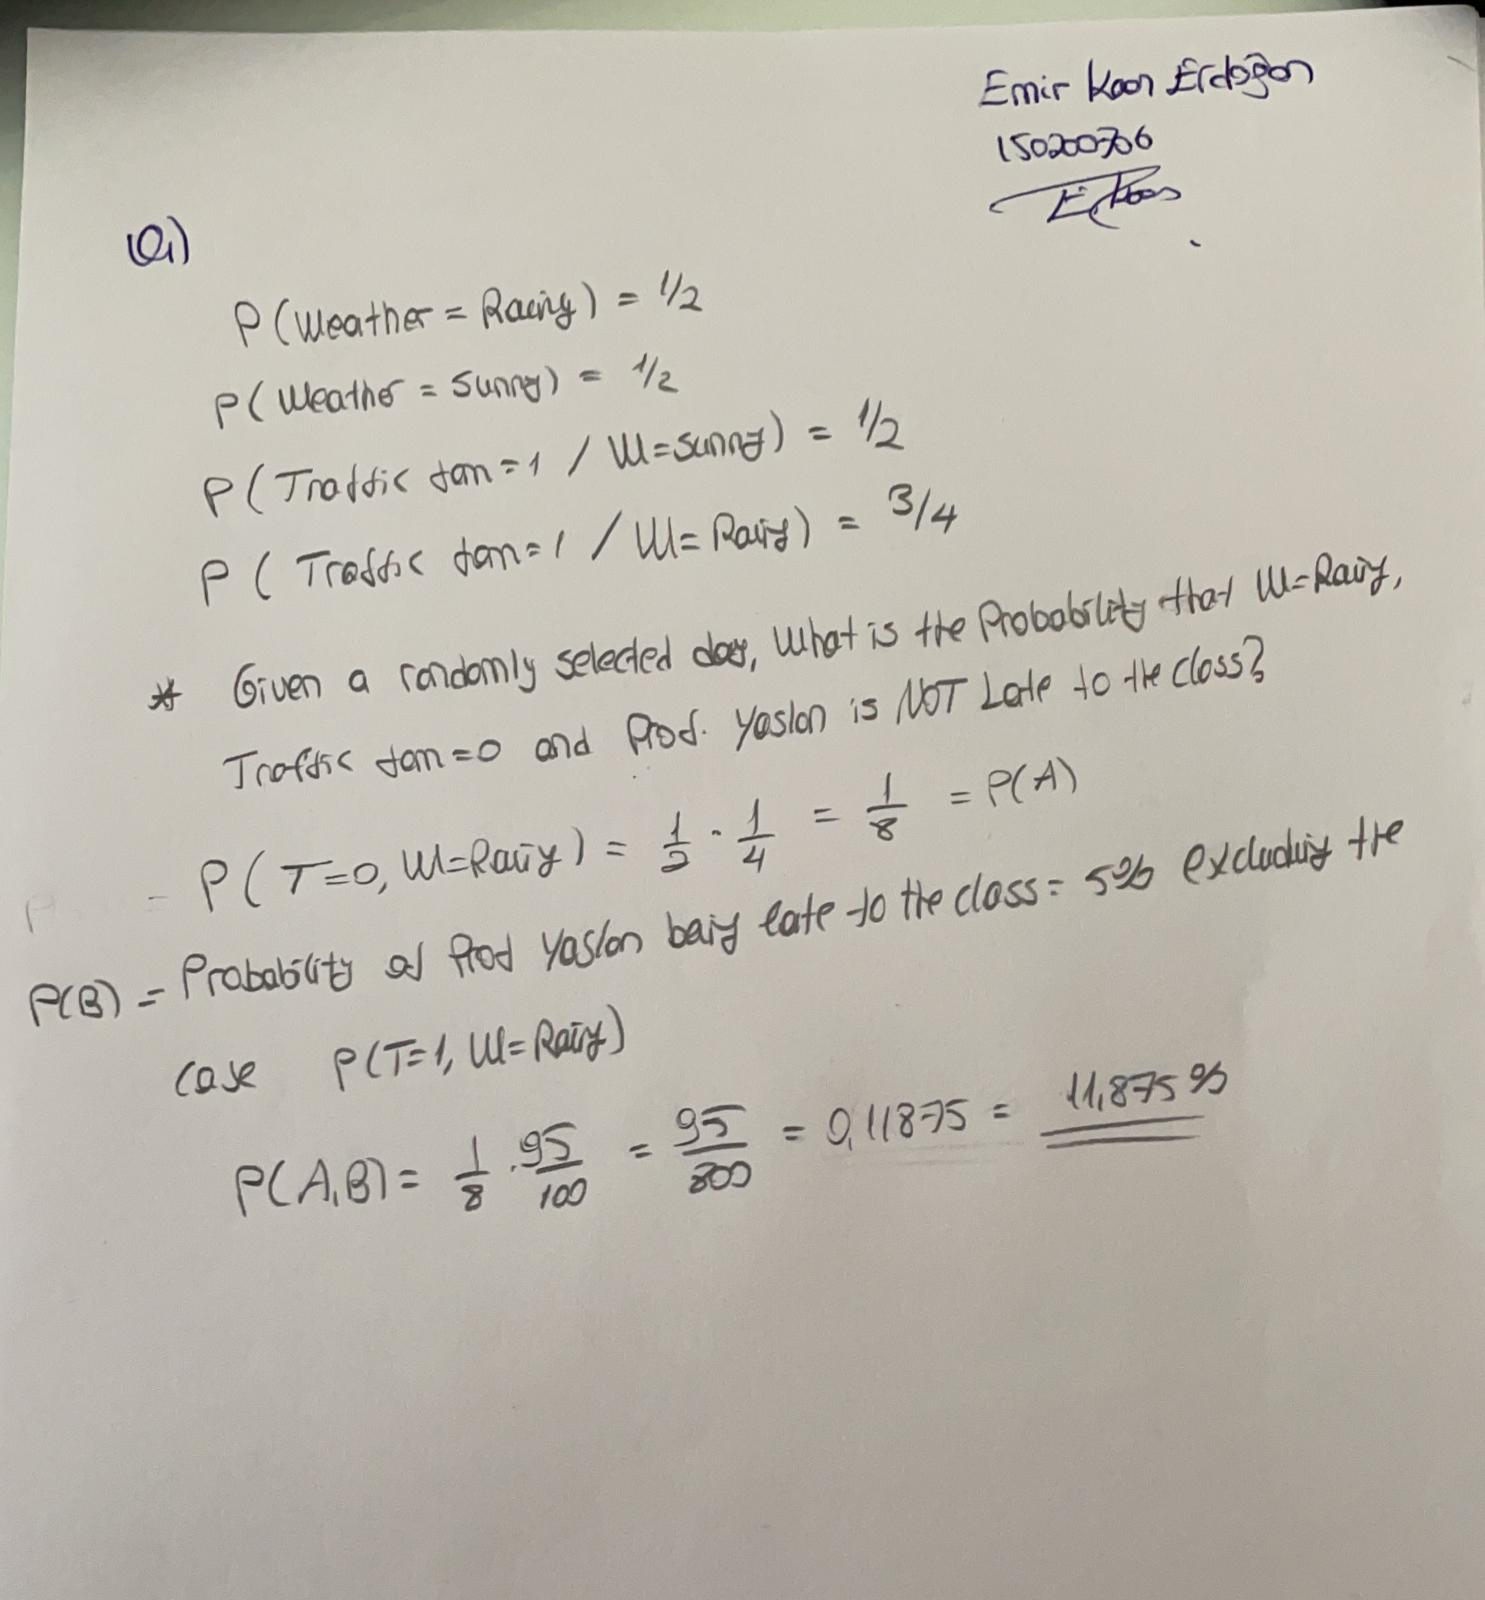

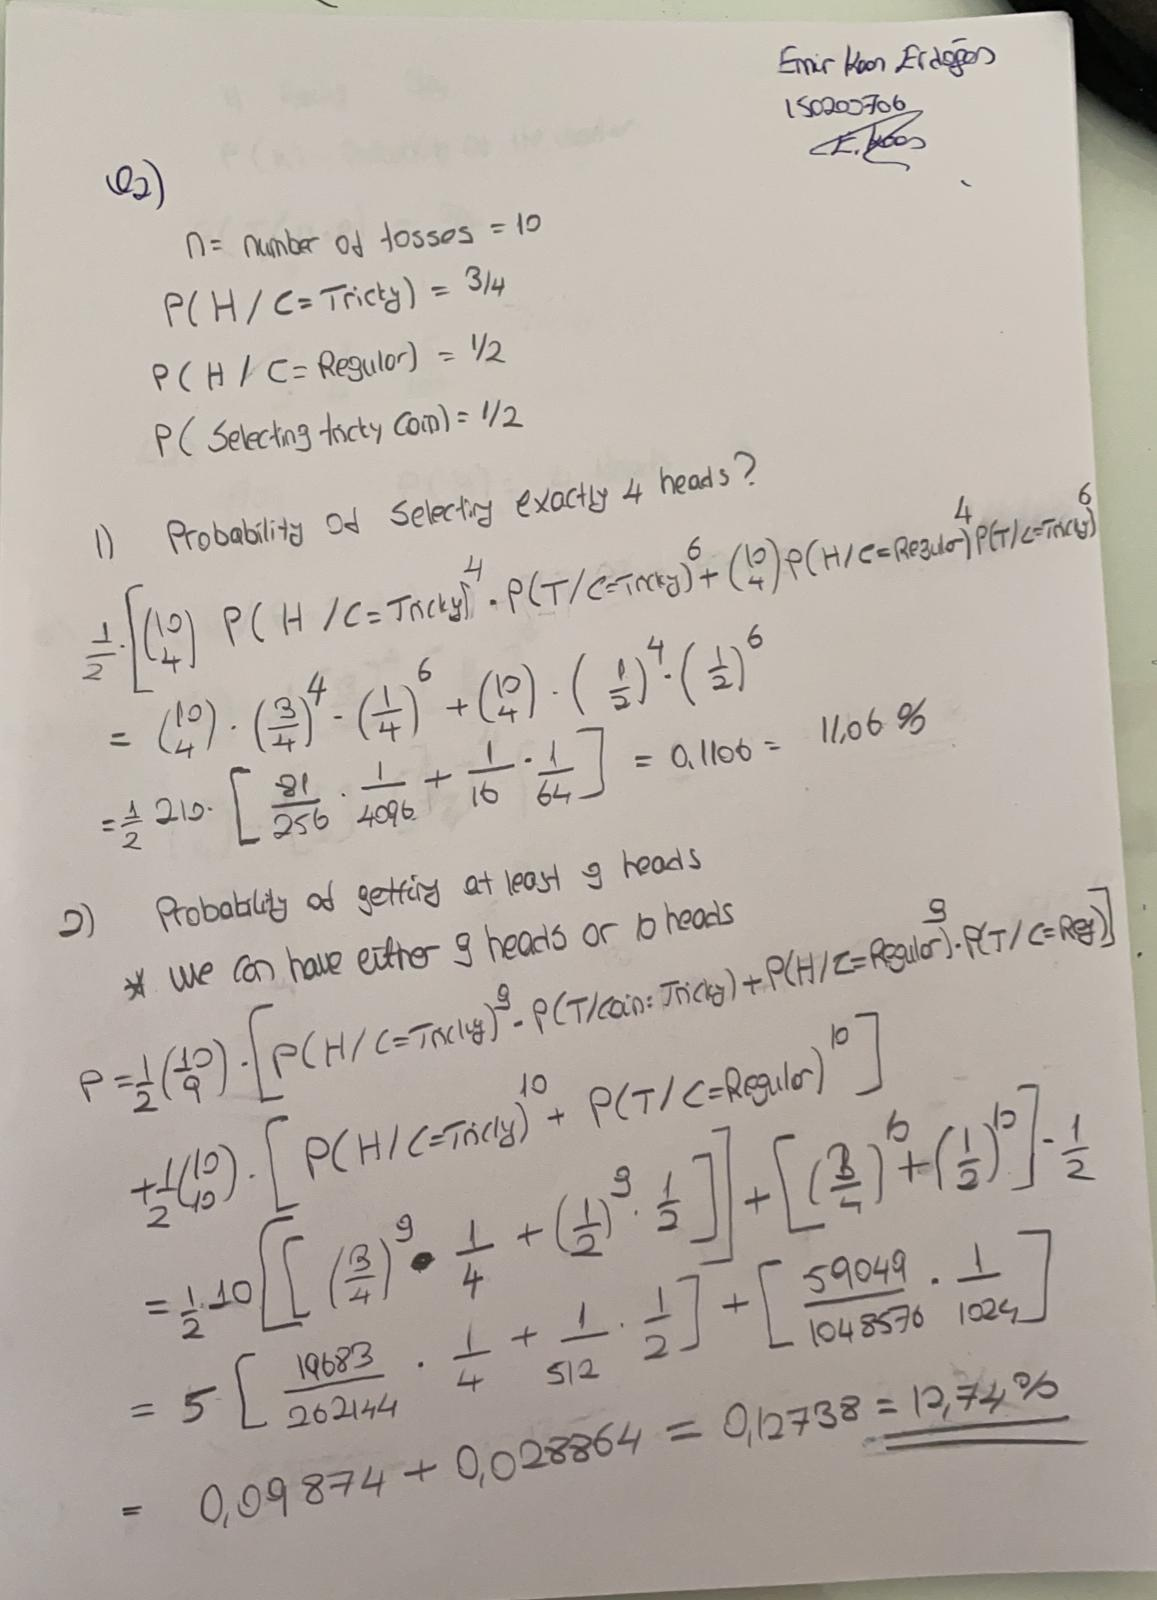